# 2021년 접종률과 미술관, 박물관의 상관분석 

- 상관분석 : 두 변수 간에 어떤 선형적 또는 비선형적 관계를 갖고 있는지 분석하는 방법
- 상관관계 : 두 변수 간의 관계의 강도
- 상관계수 : 상관관계의 정도를 파악하는 것, 두 변수 간의 연관된 정보를 나타낼 뿐 인과 관계를 설명하는 것은 아님 

- 상관계수가 0인 경우 : 두 변수간의 관계가 없다

- 미술관 21년 1-9월 관람객수와 코로나19 백신 접종률 간의 상관분석

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

# plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
from matplotlib import rc

# 맥 글자 깨짐 방지
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [4]:
f_name = '국내 코로나 확진자-백신 월별 접종률, 미술관, 박물관.xlsx'

In [5]:
c_df = pd.read_excel(f_name, sheet_name = 0, usecols = [0, 1, 9, 10, 11, 12])
art_df = pd.read_excel(f_name, sheet_name = '미술관')
m_df = pd.read_excel(f_name, sheet_name = '박물관')

In [6]:
m_df = m_df.astype({'날짜':str})

In [7]:
# 2021 행만 선택 후 인덱스 재설정
c_df = c_df[c_df.년도 == 2021]
c_df = c_df.reset_index(drop = True)

In [8]:
drop_c_df = c_df.drop(['년도', '월'], axis=1, inplace = False)

In [9]:
# 미술관 + 접종률 df
ca_df = pd.concat([art_df,drop_c_df], axis=1, join= 'inner')

# 박물관 + 접종률 df
cm_df = pd.concat([m_df,drop_c_df], axis=1, join= 'inner')

## 2021 코로나 19 백신 접종률과 미술관 방문객 수에 대한 상관 분석

In [10]:
# 합계와 코로나 확진자 수에 대한 상관관계
ca_df['합계'].corr(ca_df['누적 2차 백신 접종률'])

0.6847049276705656

In [11]:
# 피어슨 상관계수
corr = ca_df.corr(method = 'pearson')
corr

,서울,과천,덕수궁,청주,합계,1차 백신 접종률,누적 1차 백신 접종률,2차 백신 접종률,누적 2차 백신 접종률
서울,1.000000,0.705426,0.578874,0.534122,0.938415,0.654945,0.681884,0.686912,0.660154
과천,0.705426,1.000000,0.363979,0.589081,0.730594,0.408236,0.353660,0.253378,0.251894
덕수궁,0.578874,0.363979,1.000000,0.035645,0.804093,0.226740,0.491756,0.551935,0.626128
청주,0.534122,0.589081,0.035645,1.000000,0.461462,0.253719,0.366709,0.269934,0.229549
합계,0.938415,0.730594,0.804093,0.461462,1.000000,0.535127,0.662930,0.670491,0.684705
1차 백신 접종률,0.654945,0.408236,0.226740,0.253719,0.535127,1.000000,0.881470,0.855232,0.805165
누적 1차 백신 접종률,0.681884,0.353660,0.491756,0.366709,0.662930,0.881470,1.000000,0.961329,0.972737
2차 백신 접종률,0.686912,0.253378,0.551935,0.269934,0.670491,0.855232,0.961329,1.000000,0.977505
누적 2차 백신 접종률,0.660154,0.251894,0.626128,0.229549,0.684705,0.805165,0.972737,0.977505,1.000000


## 상관계수의 검증

### 2021 미술관 

- x : 총 관람객 수
- y : 누적 2차 백신 접종률

In [12]:
x = ca_df['합계'].values
y = ca_df['누적 2차 백신 접종률'].values

In [13]:
# 공분산을 표준화 시킨 상관계수
np.corrcoef(x, y)[0, 1]

0.6847049276705656

In [14]:
# (상관계수, p-value)
stats.pearsonr(x, y)

(0.6847049276705657, 0.04186513918338286)

## 시각화 

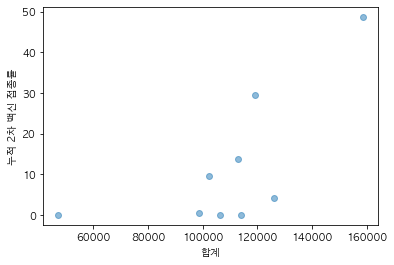

In [15]:
plt.scatter(x, y, alpha = 0.5)
plt.xlabel('합계')
plt.ylabel('누적 2차 백신 접종률')
plt.show()

<AxesSubplot:>

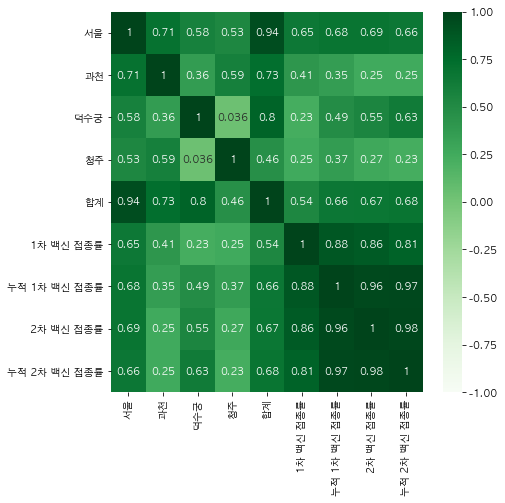

In [16]:
#heatmap으로 상관관계를 표시
plt.rcParams["figure.figsize"] = (7,7)
sns.heatmap(ca_df.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

## 2021 코로나 19 백신 접종률과 박물관 방문객 수에 대한 상관 분석

In [17]:
# 합계와 코로나 확진자 수에 대한 상관관계
cm_df['합계'].corr(ca_df['누적 2차 백신 접종률'])

0.45935491153686964

In [18]:
# 피어슨 상관계수
corr = cm_df.corr(method = 'pearson')
corr

,합계,국립중앙박물관,국립경주박물관,국립광주박물관,국립전주박물관,국립부여박물관,국립공주박물관,국립진주박물관,국립청주박물관,국립대구박물관,국립김해박물관,국립제주박물관,국립춘천박물관,국립나주박물관,국립익산박물관,1차 백신 접종률,누적 1차 백신 접종률,2차 백신 접종률,누적 2차 백신 접종률
합계,1.000000,0.989247,0.969913,0.897550,0.768182,0.893344,0.826979,0.754084,0.805565,0.726170,-0.356511,0.483184,0.922763,0.885379,0.543625,0.570306,0.574128,0.547616,0.459355
국립중앙박물관,0.989247,1.000000,0.968524,0.882481,0.734744,0.854548,0.792090,0.751911,0.779328,0.632751,-0.461294,0.517834,0.905168,0.870293,0.585642,0.626423,0.600591,0.570155,0.472938
국립경주박물관,0.969913,0.968524,1.000000,0.925701,0.683755,0.796638,0.809836,0.785314,0.716624,0.653830,-0.490322,0.440940,0.871982,0.884328,0.430004,0.683533,0.717567,0.689085,0.610950
국립광주박물관,0.897550,0.882481,0.925701,1.000000,0.763616,0.752148,0.594829,0.688768,0.610859,0.732167,-0.334401,0.116527,0.841062,0.867786,0.201422,0.676109,0.648457,0.656001,0.571720
국립전주박물관,0.768182,0.734744,0.683755,0.763616,1.000000,0.921544,0.442304,0.234558,0.845230,0.666997,0.043463,0.246470,0.859561,0.624306,0.164999,0.225365,0.077820,0.043881,-0.058899
국립부여박물관,0.893344,0.854548,0.796638,0.752148,0.921544,1.000000,0.729563,0.447730,0.949147,0.727922,-0.017901,0.481047,0.922406,0.727899,0.413270,0.251275,0.214964,0.147464,0.072002
국립공주박물관,0.826979,0.792090,0.809836,0.594829,0.442304,0.729563,1.000000,0.697269,0.741686,0.605279,-0.296541,0.629801,0.756618,0.732576,0.553866,0.307624,0.543529,0.481024,0.472156
국립진주박물관,0.754084,0.751911,0.785314,0.688768,0.234558,0.447730,0.697269,1.000000,0.287928,0.562200,-0.386512,0.294160,0.485397,0.760995,0.554560,0.761994,0.828486,0.826848,0.798290
국립청주박물관,0.805565,0.779328,0.716624,0.610859,0.845230,0.949147,0.741686,0.287928,1.000000,0.586126,-0.088767,0.561684,0.881725,0.577010,0.402452,0.088025,0.112316,0.012146,-0.045400
국립대구박물관,0.726170,0.632751,0.653830,0.732167,0.666997,0.727922,0.605279,0.562200,0.586126,1.000000,0.189893,-0.023642,0.658313,0.606194,0.238952,0.152855,0.238149,0.286948,0.239974


## 상관계수의 검증

### 2021 박물관 

- x : 총 관람객 수
- y : 누적 2차 백신 접종률

In [19]:
x = cm_df['합계'].values
y = cm_df['누적 2차 백신 접종률'].values

In [20]:
# 공분산을 표준화 시킨 상관계수
np.corrcoef(x, y)[0, 1]

0.45935491153686964

In [21]:
# (상관계수, p-value)
stats.pearsonr(x, y)

(0.45935491153686964, 0.2135349575928883)

## 시각화 

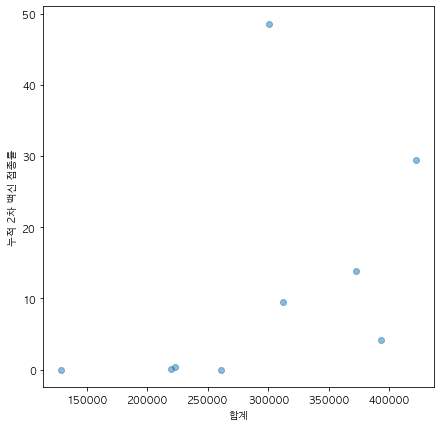

In [22]:
plt.scatter(x, y, alpha = 0.5)
plt.xlabel('합계')
plt.ylabel('누적 2차 백신 접종률')
plt.show()

<AxesSubplot:>

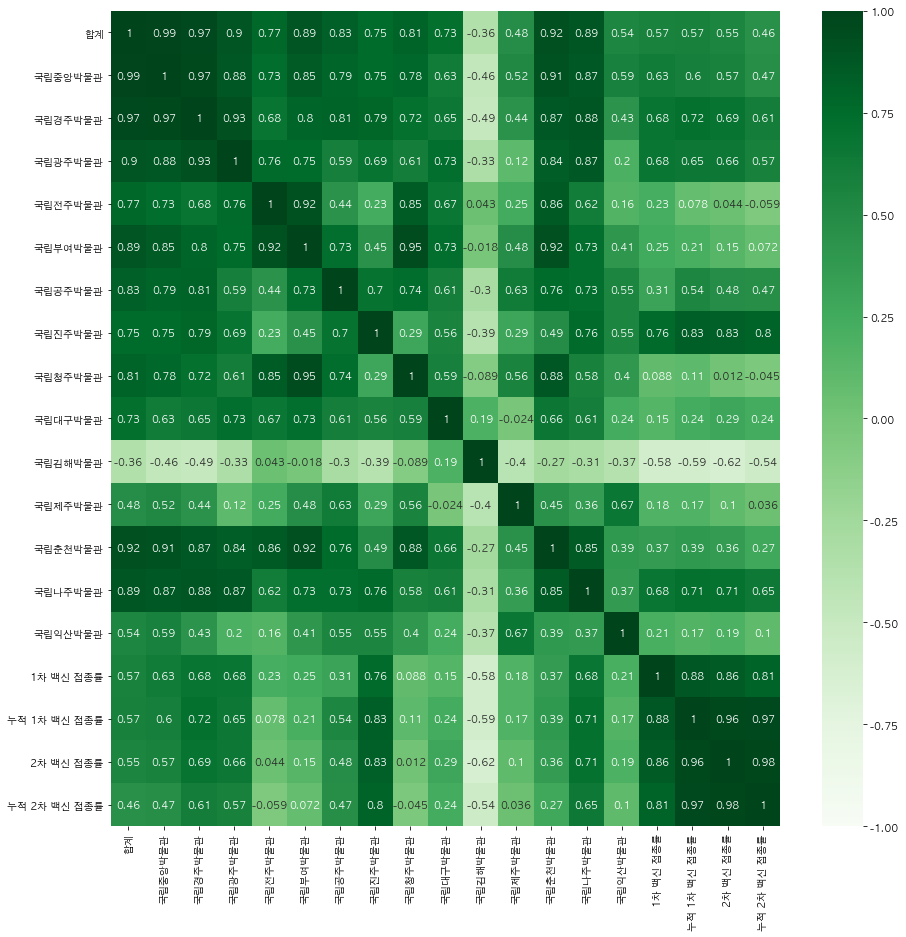

In [23]:
#heatmap으로 상관관계를 표시
plt.rcParams["figure.figsize"] = (15,15)
sns.heatmap(cm_df.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )